In [10]:
# Import necessary libraries
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
DATA_DIR = './dataset'
IMAGE_SIZE = 128
CATEGORIES = ['potholes', 'normal']

def load_data(data_dir):
    data = []
    labels = []

    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
                image = img_to_array(image)
                data.append(image)
                labels.append(class_num)
            except Exception as e:
                print(e)

    return np.array(data), np.array(labels)

X, y = load_data(DATA_DIR)
X = X / 255


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model
y_train = to_categorical(y_train, num_classes=len(CATEGORIES))
y_test = to_categorical(y_test, num_classes=len(CATEGORIES))

base_model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(CATEGORIES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Save the model
model.save('pothole_detector_model.h5')


OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



Epoch 1/10
15/15 [==============================] - 6s 294ms/step - loss: 0.3526 - accuracy: 0.8745 - val_loss: 0.0792 - val_accuracy: 0.9831
Epoch 2/10
15/15 [==============================] - 3s 229ms/step - loss: 0.0571 - accuracy: 0.9809 - val_loss: 0.0392 - val_accuracy: 0.9915
Epoch 3/10
15/15 [==============================] - 3s 221ms/step - loss: 0.0070 - accuracy: 0.9936 - val_loss: 0.0543 - val_accuracy: 0.9831
Epoch 4/10
15/15 [==============================] - 3s 223ms/step - loss: 8.5838e-04 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9831
Epoch 5/10
15/15 [==============================] - 3s 226ms/step - loss: 5.9350e-04 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9831
Epoch 6/10
15/15 [==============================] - 3s 232ms/step - loss: 2.9256e-04 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9831
Epoch 7/10
15/15 [==============================] - 4s 254ms/step - loss: 2.4785e-04 - accuracy: 1.0000 - val_loss: 0.0426 - val_accurac

C:\Users\Isiwara.Uditha\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

19/19 [==============================] - 8s 342ms/step


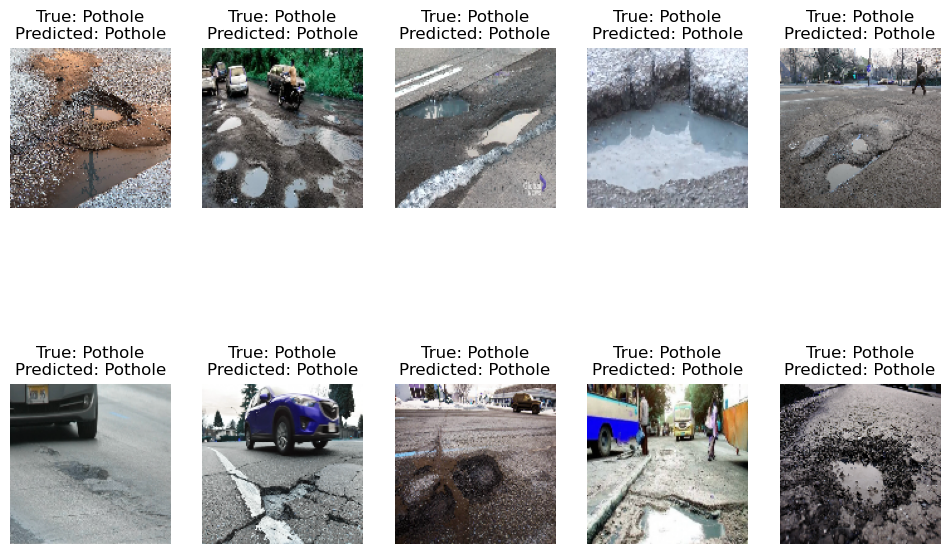

In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('pothole_detector_model.h5')

# Load and preprocess the test data
DATA_DIR = './dataset'
CATEGORIES = ['potholes', 'normal']

def load_data(data_dir):
    data = []
    labels = []

    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (128, 128))
                image = img_to_array(image)
                data.append(image)
                labels.append(class_num)
            except Exception as e:
                print(e)

    return np.array(data), np.array(labels)

X_test, y_test = load_data(DATA_DIR)
X_test = X_test / 255

# Make predictions
predictions = model.predict(X_test)

# Class names for display
class_names = ['Pothole', 'Normal']

# Display images with predictions
plt.figure(figsize=(12, 8))
for i in range(10):  # Display the first 10 images and predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i]]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()

In [5]:
predictions = model.predict(X_test)

4/4 [==============================] - 1s 167ms/step


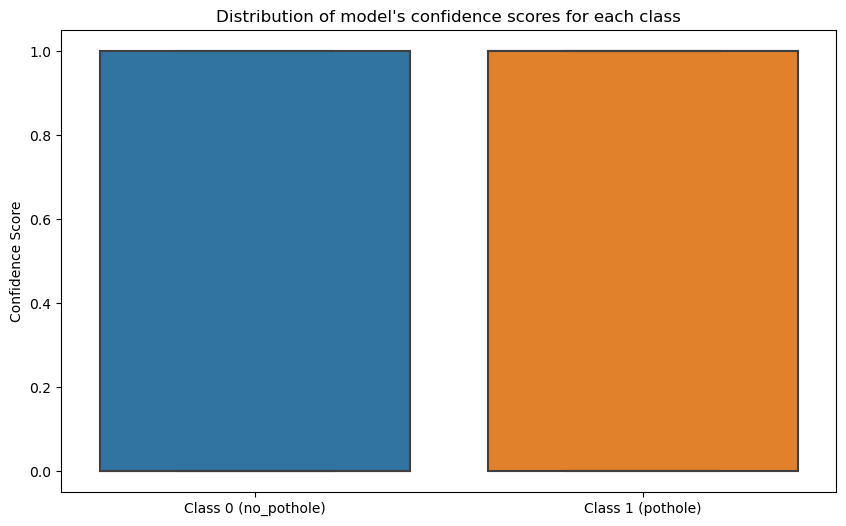

In [6]:
# generate a boX plot
import seaborn as sns
import matplotlib.pyplot as plt

class_0_scores = predictions[:, 0]
class_1_scores = predictions[:, 1]

plt.figure(figsize=(10, 6))
sns.boxplot(data=[class_0_scores, class_1_scores])
plt.xticks([0, 1], ['Class 0 (no_pothole)', 'Class 1 (pothole)'])
plt.title("Distribution of model's confidence scores for each class")
plt.ylabel('Confidence Score')
plt.show()


In [5]:
# predict the classes for the test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

4/4 [==============================] - 1s 279ms/step


In [7]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)

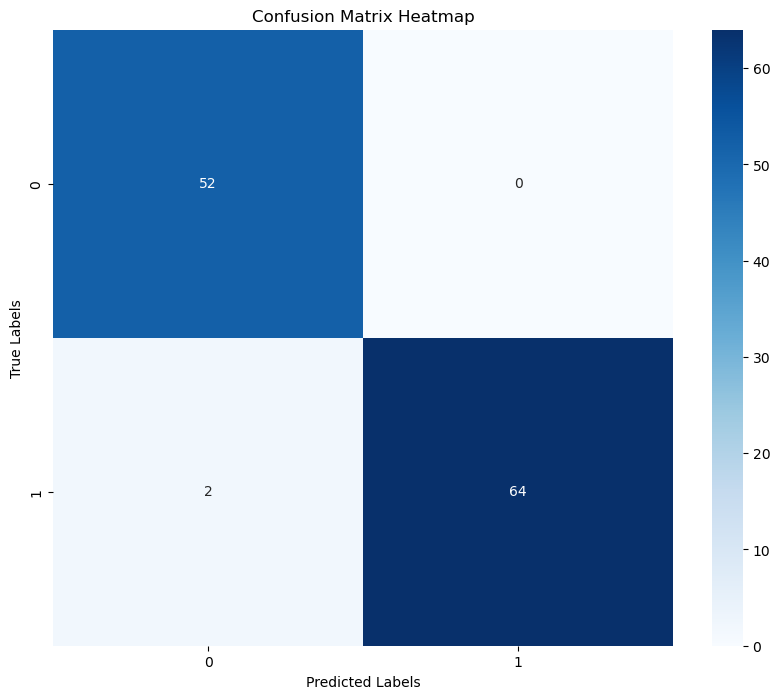

In [8]:
#Plot the heatmap using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


Epoch 1/10
15/15 [==============================] - 3s 224ms/step - loss: 1.5669e-04 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9831
Epoch 2/10
15/15 [==============================] - 3s 217ms/step - loss: 1.4821e-04 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9831
Epoch 3/10
15/15 [==============================] - 3s 216ms/step - loss: 1.3496e-04 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9831
Epoch 4/10
15/15 [==============================] - 3s 225ms/step - loss: 1.2385e-04 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9831
Epoch 5/10
15/15 [==============================] - 3s 228ms/step - loss: 1.1477e-04 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9831
Epoch 6/10
15/15 [==============================] - 3s 233ms/step - loss: 1.0834e-04 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9831
Epoch 7/10
15/15 [==============================] - 3s 222ms/step - loss: 1.0226e-04 - accuracy: 1.0000 - val_loss: 0.0420 -

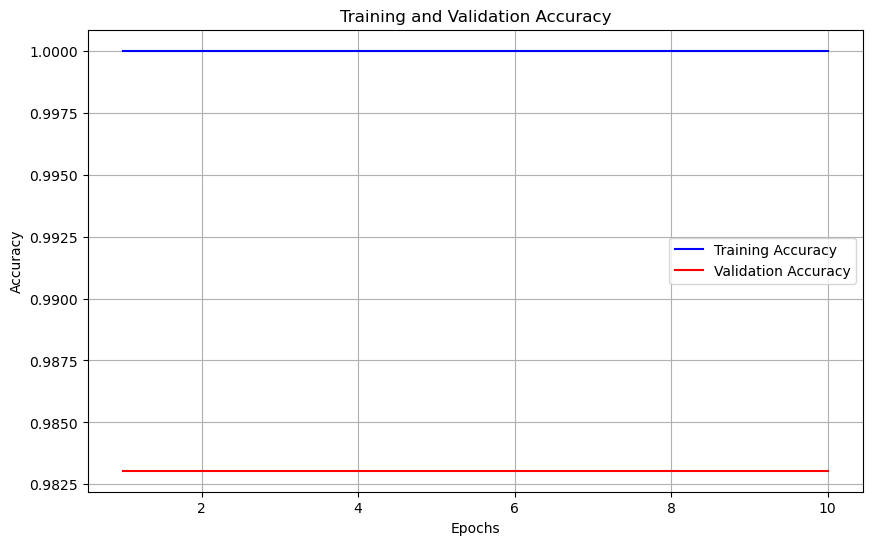

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

# Create an instance of the History class to capture training history
history = History()

# Train your model and provide the history object to capture the training history
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[history])

# Access training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Access the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create a plot to show accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

19/19 [==============================] - 7s 318ms/step


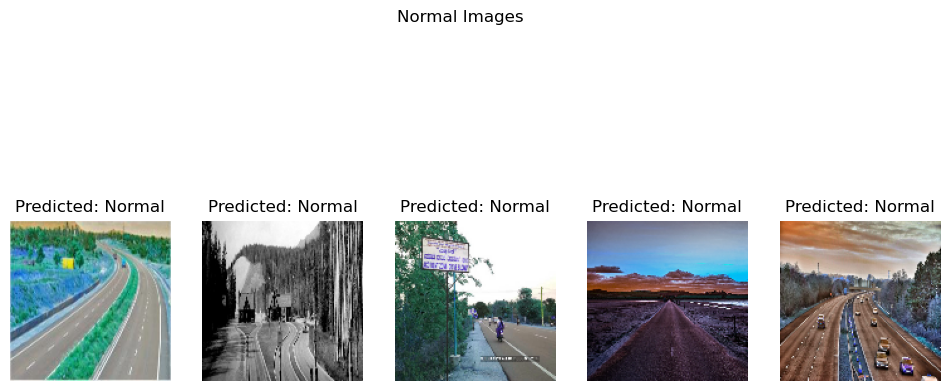

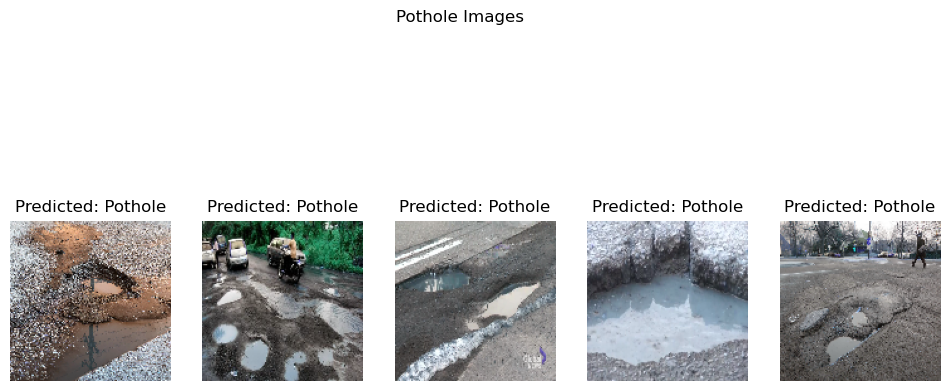

In [13]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('pothole_detector_model.h5')

# Load and preprocess the test data
DATA_DIR = './dataset'
CATEGORIES = ['potholes', 'normal']

def load_data(data_dir):
    data = []
    labels = []

    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (128, 128))
                image = img_to_array(image)
                data.append(image)
                labels.append(class_num)
            except Exception as e:
                print(e)

    return np.array(data), np.array(labels)

X_test, y_test = load_data(DATA_DIR)
X_test = X_test / 255

# Make predictions
predictions = model.predict(X_test)

# Class names for display
class_names = ['Pothole', 'Normal']

# Create separate lists for normal and pothole images
normal_images = [X_test[i] for i in range(len(y_test)) if y_test[i] == 1]
pothole_images = [X_test[i] for i in range(len(y_test)) if y_test[i] == 0]

# Display some normal images
plt.figure(figsize=(12, 6))
plt.suptitle("Normal Images")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(normal_images[i])
    plt.title(f'Predicted: {class_names[np.argmax(predictions[y_test == 1][i])]}')
    plt.axis('off')

# Display some pothole images
plt.figure(figsize=(12, 6))
plt.suptitle("Pothole Images")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(pothole_images[i])
    plt.title(f'Predicted: {class_names[np.argmax(predictions[y_test == 0][i])]}')
    plt.axis('off')

plt.show()
